#Actividad 7
Algebra lineal con Scipy\
Utilizaremos la biblioteca scipy.linalg para operar con vectores y matrices (Arreglos de NumPy: 1-D, 2-D, 3-D, etc).


In [ ]:
# 1 de marzo de 2021
# Cargamos las bibliotecas para trabajar en Algebra Lineal

import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline

**Ejercicio 1**\
Defina las siguientes matrices.

$$\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation*}$$$$\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}$$
y la matrix identidad

$$\begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}$$

Calcule el resultado de $2*I+3*A+A@B$.

Para definir la matriz identidad, se puede utilizar la función **np.eye(2, dtype=int)**. Ver manual de np.eye().

Matriz A

In [ ]:
# Definimos un arreglo 2-D
# Una matriz M de dimensión 2 (2-D)
A=np.array([[1,3],[-1,7]])
print(A) 

[[ 1  3]
 [-1  7]]


Matriz B

In [ ]:
# Definimos un arreglo 2-D
# Una matriz M de dimensión 2 (2-D)
B=np.array([[5,2],[1,2]])
print(B) 

[[5 2]
 [1 2]]


Matriz Identidad

In [ ]:
# Definimos un arreglo 2-D con la función eye
# Una matriz M de dimensión 2 (2-D)
I=np.eye(2, dtype=int)
print(I) 

[[1 0]
 [0 1]]


In [ ]:
#Calcular el resultado
R=(2*I)+(3*A)+(A@B)
print('El resultado es')
print(R)

El resultado es
[[13 17]
 [-1 35]]


**Ejercicio 2**\
Los polinomios característicos y el Teorema de Cayley-Hamilton.\
El polinomio ctarcterístico de una Matriz M esta dado en general por la ecuación $$det(M-\lambda I)=0$$
Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como $$P_{2}(\lambda)=det(M)-tr(M)\lambda + \lambda^{2}$$
y para una Matriz cuadrada M (3x3), el polinomio característico resulta ser
$$
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
$$
El **Teorema de Cayley-Hamilton** nos dice que una Matriz cuadrada M (2x2), satis face el polinomio característico 
$$
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
$$
y en general cualquier Matriz cuadrada M (nxn), satisface $P_{n}(M)$.

Demuestre esto para cualquier Matriz M (2x2), $det(M)\not= 0$.

In [ ]:
# Definimos una matriz M
M=np.array([[1,2],[3,4]])
print(M)

[[1 2]
 [3 4]]


In [ ]:
# Hacemos la traza de la Matriz M
tr_M=np.trace(M)
# El determinante de la Matriz M 
det_M=la.det(M)
#Matriz de identidad
I=np.eye(2, dtype=int)

#Probando el teorema Cayley-Hamilton
P=mpow(M,2) - tr_M*M + det_M * I
print(P)

[[0. 0.]
 [0. 0.]]


Ejemplo Random

In [ ]:
#Números random del cero al 10 para una Matriz 2x2
D=np.random.randint(0,10,[2,2])
print(D)

[[1 3]
 [1 6]]


In [ ]:
# Hacemos la traza de la Matriz D
tr_D=np.trace(D)
# El determinante de la Matriz D 
det_D=la.det(D)
#Matriz de identidad
I=np.eye(2, dtype=int)

#Probando el teorema Cayley-Hamilton
T=mpow(D,2) - tr_D*D + det_D * I
print(T)

[[0. 0.]
 [0. 0.]]


**Ejercicio 3**\
Resuelve el sistema de ecuaciones.
$$\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}$$
Utilizando el Método de Eliminación Gaussiana y la función **scipy.linalg.solve()**

In [ ]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
  "Intercambiar renglones i y j en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  E[i,i]=0
  E[j,j]=0
  E[i,j]=1
  E[j,i]=1
  return E @ A

# Multiplicar un renglón por un aconstante no nula.
def scale_row(A,k,i):
  "Multiplicar el renglón i por k en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  E[i,i]=k
  return E @ A

# Sumar un múltiplo de un renglón a otro renglón.
def add_row(A,k,i,j):
  "Sumar k vaces el renglón j al renglón i en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  if i== j:
    E[i,j]=k+1
  else:
    E[i,j]=k
  return E @ A

In [ ]:
# Matriz H 
H= np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print(H)
print('det(H)=', la.det(H))

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]
det(H)= -1.0000000000000004


In [ ]:
#Matriz Aumentada G: Unimos la Matriz H con la Matriz Identidad
G= np.hstack([H,np.eye(3)])
print(G)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 1)  -3R1 + R2 -> R2
G1 = add_row(G,-3,1,0)
print(G1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 2) 1/5R2 -> R2
G2 = scale_row(G1,1/5,1)
print(G2)

[[ 1.  -3.   1.   1.   0.   0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   2.  -1.   0.   0.   1. ]]


In [ ]:
# 3) 3R2 + R1 -> R1
G3_tmp = add_row(G2,3,0,1)
print(G3_tmp) 

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   2.  -1.   0.   0.   1. ]]


In [ ]:
# 4) -2R2 + R3 -> R3
G4 = add_row(G3_tmp,-2,2,1)
print(G4)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]


In [ ]:
# 5) -5R3 -> R3
G5 = scale_row(G4,-5,2)
print(G5)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   0.   1.  -6.   2.  -5. ]]


In [ ]:
# 6) 2/5R3 + R2 -> R2
G6 = add_row(G5,2/5,1,2)
print(np.round(G6,2))

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   1.  -0.  -3.   1.  -2. ]
 [ 0.   0.   1.  -6.   2.  -5. ]]


In [ ]:
# 7) 1/5R3 + R1 -> R1
G7 = add_row(G6,1/5,0,2)
print(np.round(G7,2))

[[ 1.  0. -0. -2.  1. -1.]
 [ 0.  1. -0. -3.  1. -2.]
 [ 0.  0.  1. -6.  2. -5.]]


In [ ]:
#Hemos obtenido la inversa
H_inv = G7[:,3:]
print(H_inv)

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [ ]:
# El producto de H_inv @ H = I
result1= H_inv @ H
print(np.round(result1,2))

[[ 1.  0. -0.]
 [-0.  1. -0.]
 [-0.  0.  1.]]


In [ ]:
#Checamos la inversa de G con la función la.inv(G)
la.inv(H)

array([[-2.,  1., -1.],
       [-3.,  1., -2.],
       [-6.,  2., -5.]])

In [ ]:
# Definiendo el vector b
b=np.array([1,5,0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [ ]:
#La solución es:
x = H_inv @ b
print(x)

[[3.]
 [2.]
 [4.]]


La manera más fácil\
Con la función **scipy.linalg.solve()**

In [ ]:
# Definiendo el vector b
b=np.array([1,5,0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [ ]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x_sol=la.solve(H,b)
print(x_sol)

[[3.]
 [2.]
 [4.]]


**Ejercicio 4**\
Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre Eigenvalores y Eigenvectores)
$$\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}$$
Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.

In [ ]:
## Definimos los vectores B1, B2, B3
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

print('B1:')
print(B1)
print('B2:')
print(B2)
print('B3:')
print(B3)

B1:
[[2 0 0]
 [0 3 4]
 [0 4 9]]
B2:
[[0 1 0]
 [0 0 1]
 [1 0 0]]
B3:
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [ ]:
# Obtenemos los eigenvalores/vectores con la biblioteca scipy.linalg.eig()
eigvals1, eigvecs1 = la.eig(B1)
print('Los eigenvalores de B1:')
print(np.round(eigvals1,2))
print('Los eigenvectores de B1:')
print(np.round(eigvecs1,2))
print('             ')

eigvals2, eigvecs2 = la.eig(B2)
print('Los eigenvalores de B2:')
print(np.round(eigvals2,2))
print('Los eigenvectores de B2:')
print(np.round(eigvecs2,2))
print('             ')

eigvals3, eigvecs3 = la.eig(B3)
print('Los eigenvalores de B3:')
print(np.round(eigvals3,2))
print('Los eigenvectores de B1:')
print(np.round(eigvecs3,2))
print(eigvecs1)

Los eigenvalores de B1:
[11.+0.j  1.+0.j  2.+0.j]
Los eigenvectores de B1:
[[ 0.    0.    1.  ]
 [ 0.45  0.89  0.  ]
 [ 0.89 -0.45  0.  ]]
             
Los eigenvalores de B2:
[-0.5+0.87j -0.5-0.87j  1. +0.j  ]
Los eigenvectores de B2:
[[ 0.58+0.j   0.58-0.j  -0.58+0.j ]
 [-0.29+0.5j -0.29-0.5j -0.58+0.j ]
 [-0.29-0.5j -0.29+0.5j -0.58+0.j ]]
             
Los eigenvalores de B3:
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Los eigenvectores de B1:
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.58 -0.58]
 [ 0.    0.   -0.58  0.58]
 [ 1.   -1.    0.58 -0.58]]
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [ ]:
# Formamos la matriz de los eigenvectores
P = np.array([[0,0,1],[0.4472136,0.89442719,0],[0.89442713,-0.4472136,0]])
print('La matriz de eigenvectores de B1 es:')
print(P)

La matriz de eigenvectores de B1 es:
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442713 -0.4472136   0.        ]]


In [ ]:
# La matriz de los eigenvalores en la diagonal la definimos con
D = np.diag((11,1,2))
print('La matriz diagonal de eigenvalores es:')
print(D)

La matriz diagonal de eigenvalores es:
[[11  0  0]
 [ 0  1  0]
 [ 0  0  2]]


In [ ]:
# Calculamos M = P D P^{-1}
# Veremos que es la matriz B1

M = P @ D @ la.inv(P)
print(M)

[[2.         0.         0.        ]
 [0.         3.00000014 4.00000024]
 [0.         3.99999997 8.99999986]]


In [ ]:
# Calculamos la potencia k=25 de B1
k=25
P_inv = la.inv(P)

print('La matriz de eigenvectores:')
print(P)
print('La matriz inversa de P: ')
print(P_inv)

La matriz de eigenvectores:
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442713 -0.4472136   0.        ]]
La matriz inversa de P: 
[[-0.          0.44721362  0.89442724]
 [-0.          0.89442718 -0.44721362]
 [ 1.          0.          0.        ]]


In [ ]:
# Ahora calculamos usando la propiedad de diagonalización de M
X = P @ D**25 @ P_inv
print(np.round(X,2))

[[ 3.35544320e+07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.12702791e+17 -1.02540557e+18]
 [ 0.00000000e+00 -1.02540550e+18 -2.05081098e+18]]


**Ejercicio 5**\
Se tienen los siguientes 8 puntos:
$$\begin{eqnarray*} 
(x&,&y) \\
(0.0 &,& 0.0), \\ 
(0.5 &,& 0.47942), \\ 
(1.0 &,& 0.84147), \\
(1.5 &,& 0.99749), \\
(2.0 &,& 0.90930), \\
(2.5 &,& 0.59847), \\
(3.0 &,& 0.14112), \\
(3.5 &,& -0.35078) \\
\end{eqnarray*}$$
Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos.

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.


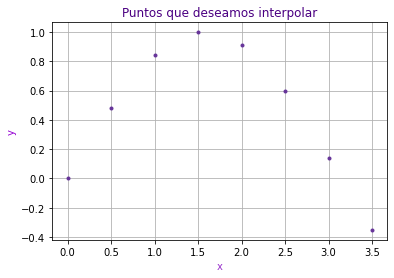

In [ ]:
#Hacemos una interpolación con un polinimio de grado 7 para los 8 puntos.
x = np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
y = np.array([0.0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078])

# Gráficamos los puntos dados que vamos a interpolar.
plt.plot(x,y,'r.', color='rebeccapurple')
plt.grid()
plt.title('Puntos que deseamos interpolar', color='indigo')
plt.xlabel('x', color='darkorchid')
plt.ylabel('y', color='darkviolet')
plt.show()

In [ ]:
# Creamos la matriz de Vandemonde, e imprimimos los primeros renglones y columnas
X = np.column_stack([x**k for k in range (0,8)])
print(X[:5,:5])

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


In [ ]:
#La biblioteca Numpy tiene una función para crear la matriz de Vandemonde
X = np.vander(x, increasing=True)
#Solo imprimimos los primeros 5 renglones y columnas
print(X[:5,:5])

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


In [ ]:
# Usamos la función de scipy.linalg.solve(), para encontrar los 8 coeficientes 
# de la solución lineal Xa=y
a = la.solve(X,y)
print(np.round(a,1))

[ 0.   1.  -0.  -0.2 -0.   0.  -0.   0. ]


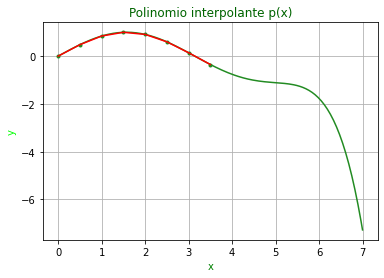

In [ ]:
#Graficamos el polinomio interpolante y los puntos interpolados
# Los puntos interpolados en verde 'r.
xs = np.linspace(0,8-1,200)
ys = sum([a[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys,color='forestgreen')
plt.plot(x, np.sin(x), color='red')
plt.grid()
plt.title('Polinomio interpolante p(x)', color='darkgreen')
plt.xlabel('x',color='green')
plt.ylabel('y', color='lime')
plt.show()

**Ejercicio 6**\
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.\
**NOTA:** Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones.

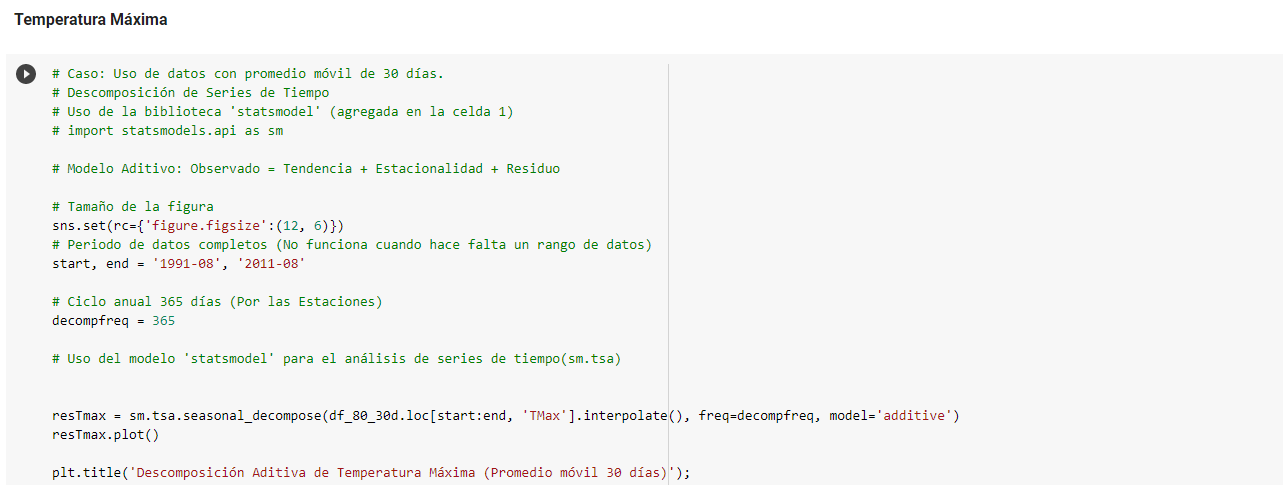


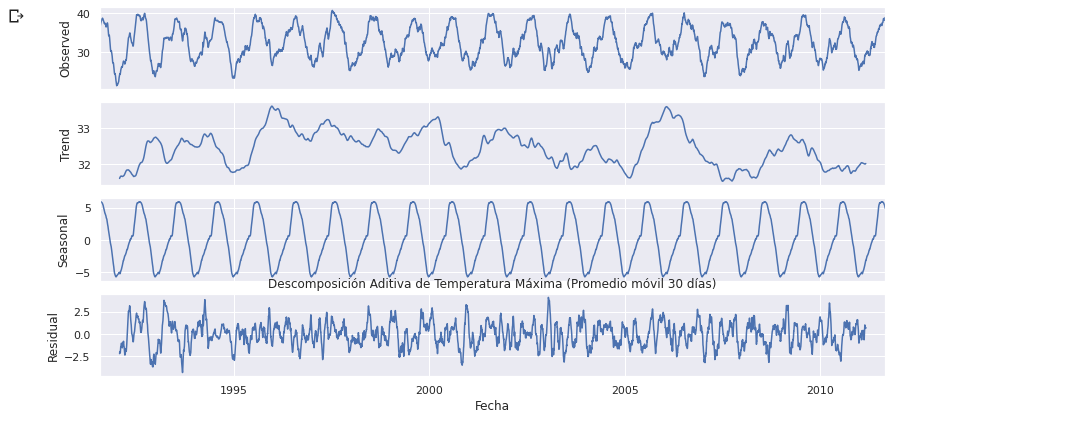

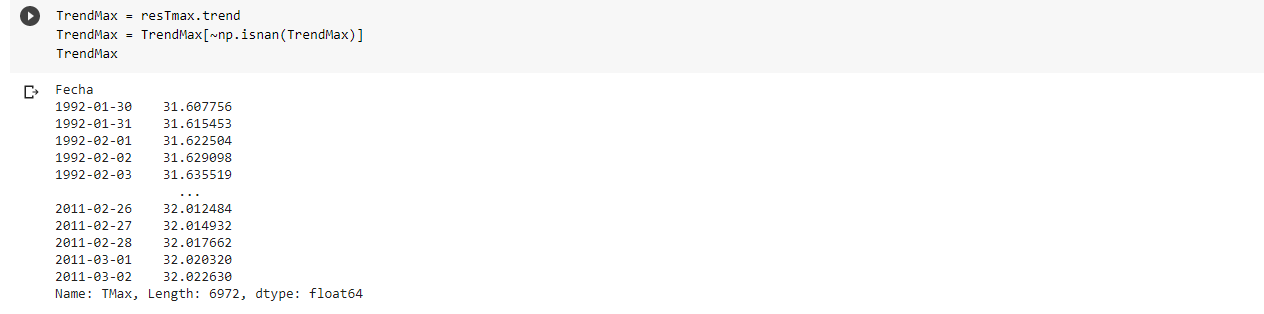

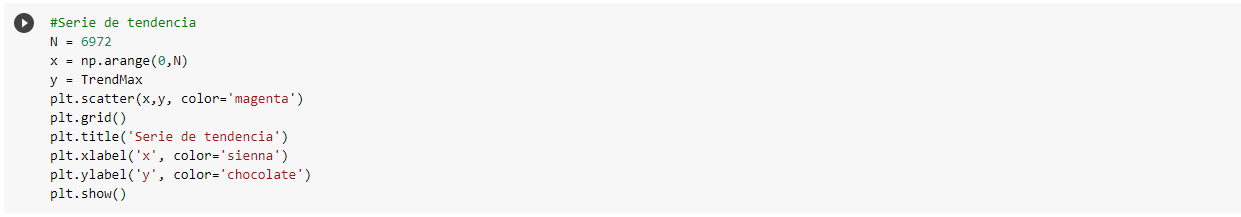

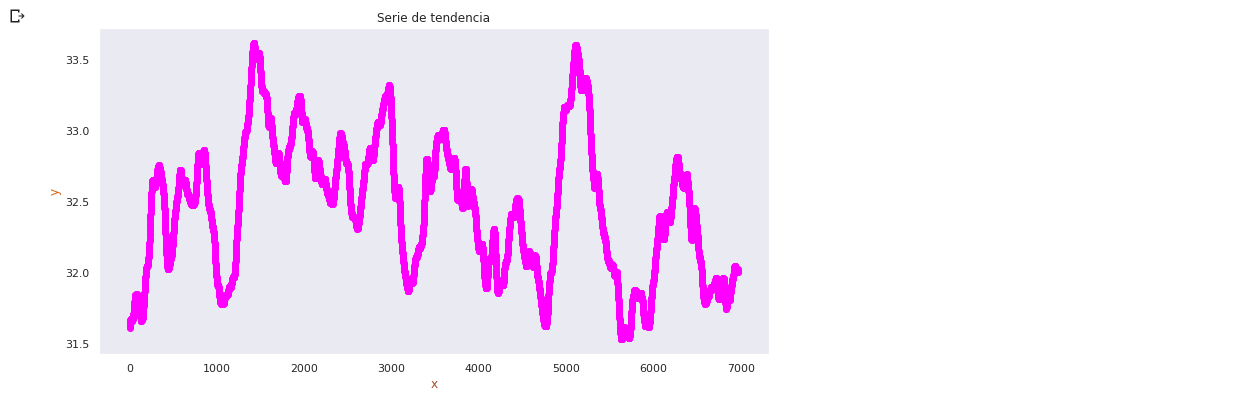

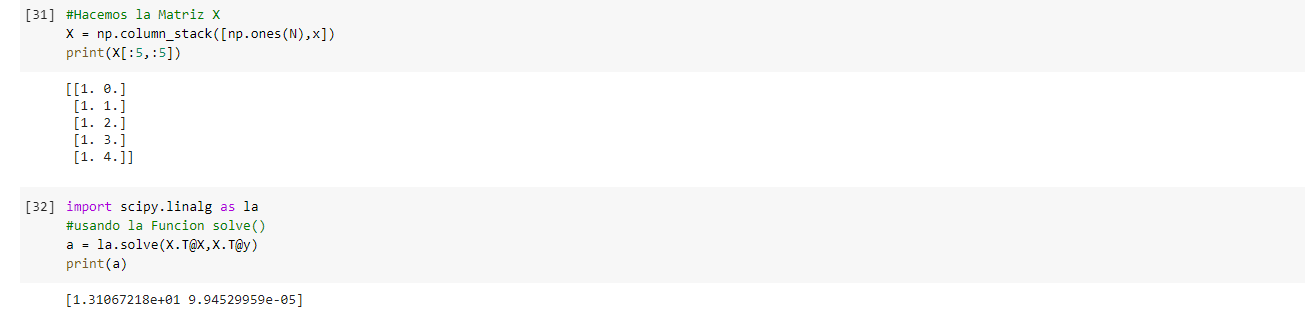

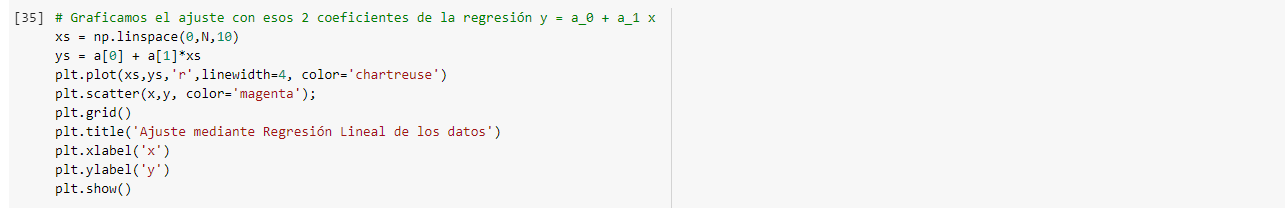

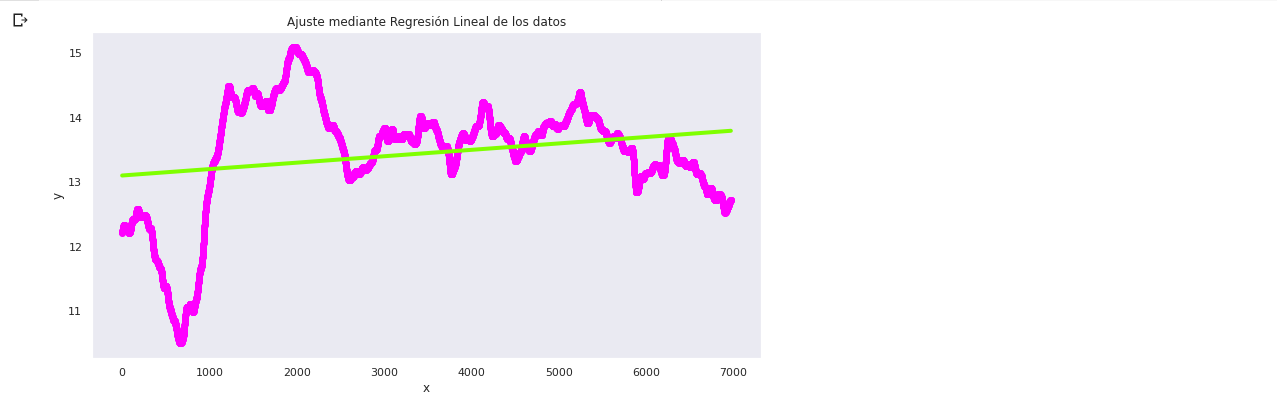

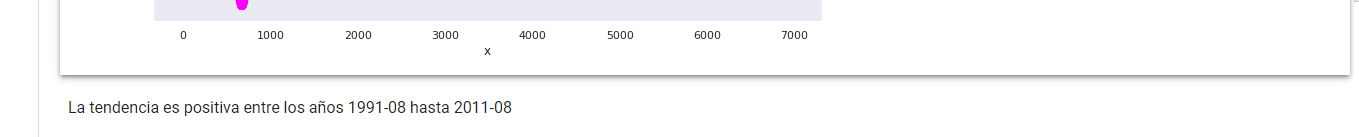

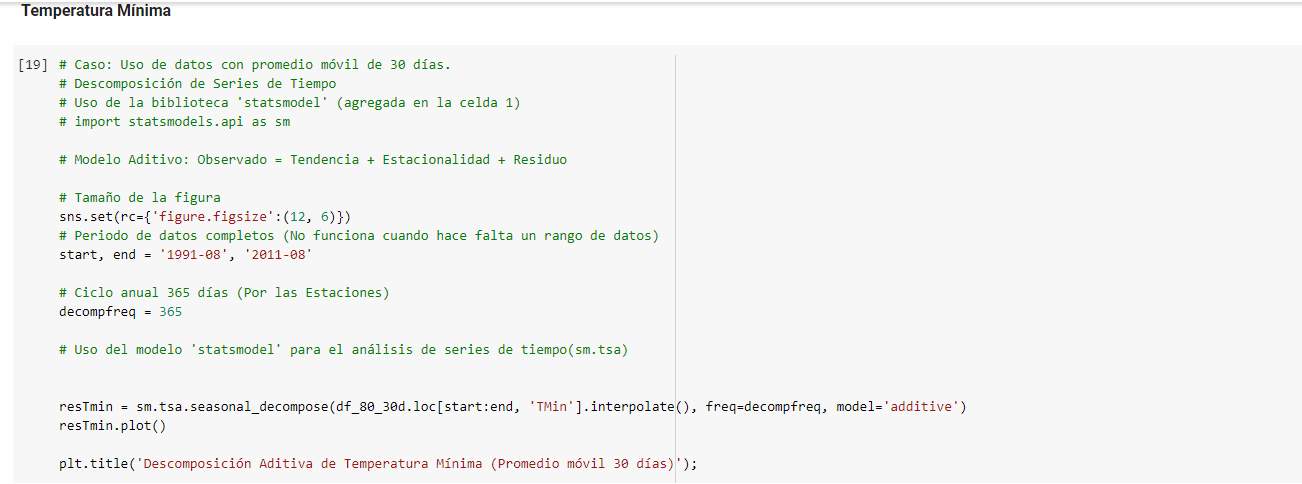

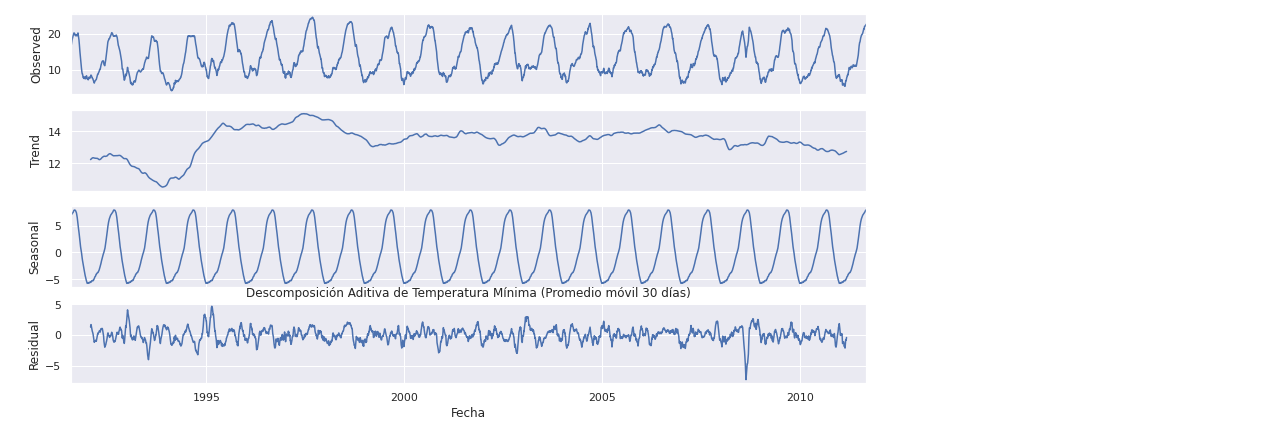

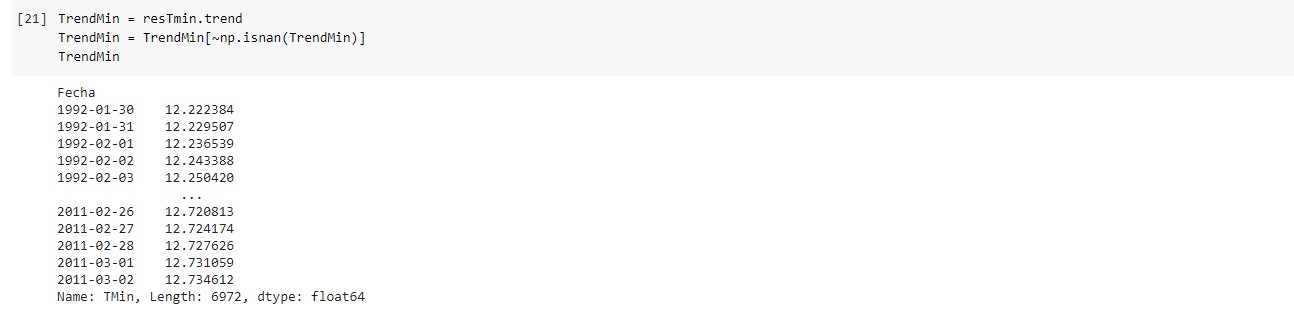

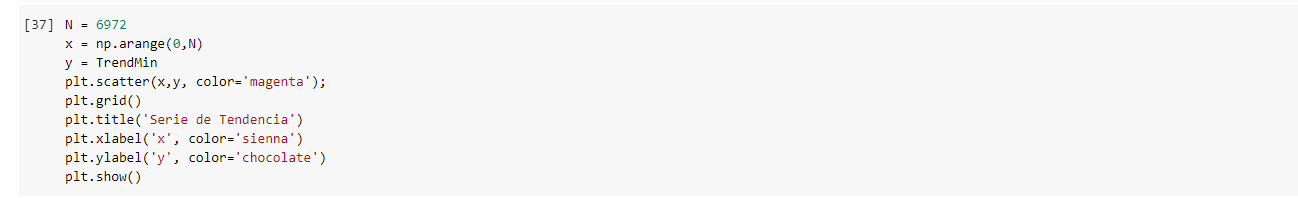

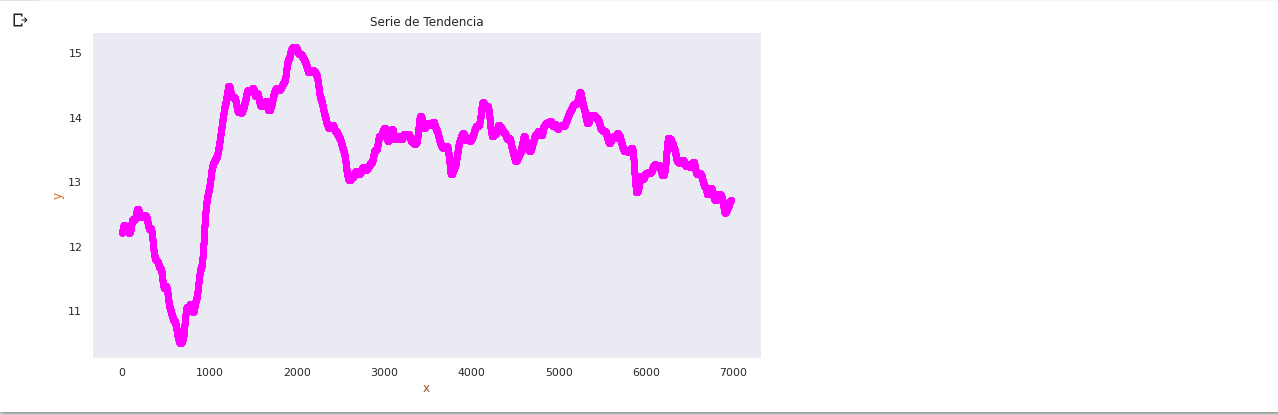

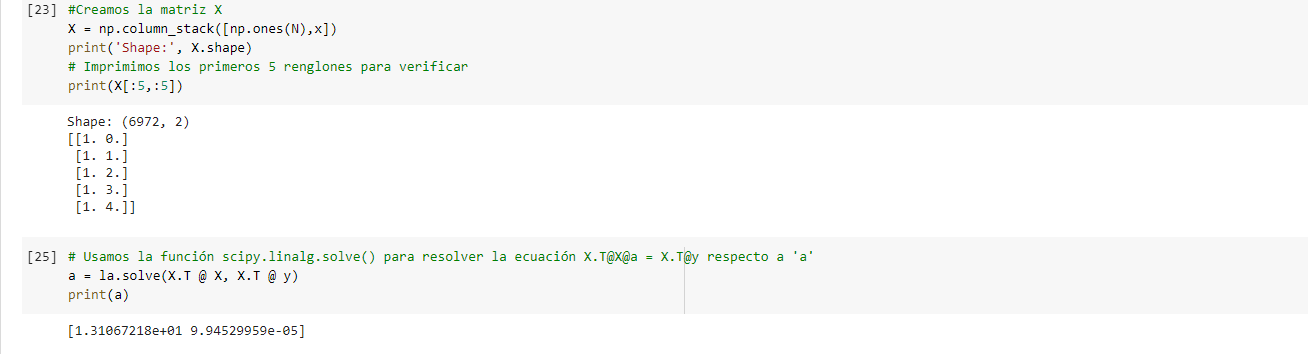

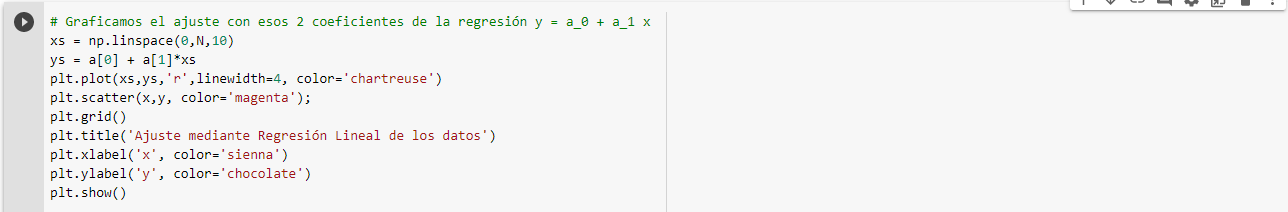

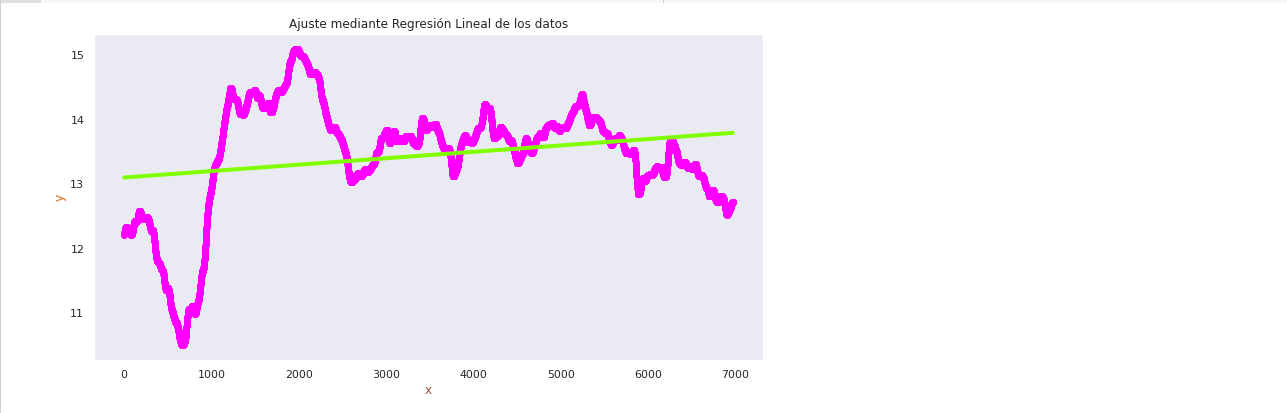

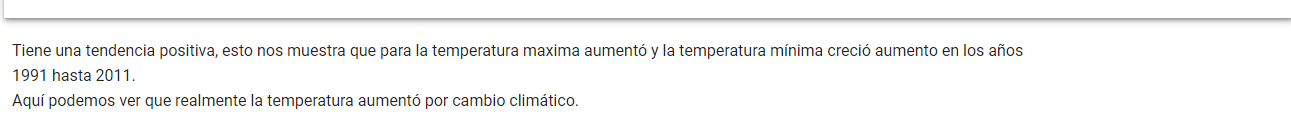